# Text analysis and topic modeling of the pubmed papers 

In [ ]:
!pip install gensim

In [ ]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import numpy as np

import gensim
import nltk

from nltk.corpus import stopwords

import gensim.corpora as corpora

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer

from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import pyLDAvis.gensim_models as gensimvis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading of the paper titles and abstracts already preprocessed(punctuation removal and normalization) and plots

In [ ]:
df = pd.read_csv("drive/MyDrive/Bioscienze/Progetto/Data/data_text/sugar_clean.csv")
df_human = pd.read_csv("drive/MyDrive/Bioscienze/Progetto/Data/data_text/sugar_human_clean.csv")

In [ ]:
df

,id,title,abstract,year,all_text,clean_text,clean_title,clean_abstract
0,37240315,SIRT2 Deficiency Aggravates Diet-Induced Nonal...,"Non-alcoholic fatty liver disease (NAFLD), cha...",2023.0,SIRT2 Deficiency Aggravates Diet-Induced Nonal...,sirt deficiency aggravates dietinduced nonalco...,sirt deficiency aggravates dietinduced nonalco...,nonalcoholic fatty liver disease nafld charact...
1,37210385,Ginger essential oil and citral ameliorates at...,"Recently, the role of the gut microbiota in di...",2023.0,Ginger essential oil and citral ameliorates at...,ginger essential oil and citral ameliorates at...,ginger essential oil and citral ameliorates at...,recently the role of the gut microbiota in dis...
2,37207566,Antiobesity effect of L-arabinose via ameliora...,"The global prevalence of obesity, a chronicall...",2023.0,Antiobesity effect of L-arabinose via ameliora...,antiobesity effect of larabinose via ameliorat...,antiobesity effect of larabinose via ameliorat...,the global prevalence of obesity a chronically...
3,37172822,Excess Dietary Sugar Alters Colonocyte Metabol...,The colonic epithelium requires continuous ren...,2023.0,Excess Dietary Sugar Alters Colonocyte Metabol...,excess dietary sugar alters colonocyte metabol...,excess dietary sugar alters colonocyte metabol...,the colonic epithelium requires continuous ren...
4,37169244,Intake of Caffeine Containing Sugar Diet Remod...,The diet-microbiome-immunity axis is one among...,2023.0,Intake of Caffeine Containing Sugar Diet Remod...,intake of caffeine containing sugar diet remod...,intake of caffeine containing sugar diet remod...,the dietmicrobiomeimmunity axis is one among t...
...,...,...,...,...,...,...,...,...
668,12514022,Potential rates of fermentation in digesta fro...,Microbial catabolic capacity in digesta from t...,2003.0,Potential rates of fermentation in digesta fro...,potential rates of fermentation in digesta fro...,potential rates of fermentation in digesta fro...,microbial catabolic capacity in digesta from t...
669,11870958,Cariogenicity of different types of milk: an e...,This study evaluated the cariogenic potential ...,2002.0,Cariogenicity of different types of milk: an e...,cariogenicity of different types of milk an ex...,cariogenicity of different types of milk an ex...,this study evaluated the cariogenic potential ...
670,10867049,In vitro fermentation pattern of D-tagatose is...,Knowledge of the fermentation pattern of D-tag...,2000.0,In vitro fermentation pattern of D-tagatose is...,in vitro fermentation pattern of dtagatose is ...,in vitro fermentation pattern of dtagatose is ...,knowledge of the fermentation pattern of dtaga...
671,10222392,D-tagatose has low small intestinal digestibil...,"The digestibility of D-tagatose, its effect on...",1999.0,D-tagatose has low small intestinal digestibil...,dtagatose has low small intestinal digestibili...,dtagatose has low small intestinal digestibili...,the digestibility of dtagatose its effect on t...


In [ ]:
df_human

,id,title,abstract,year,all_text,clean_text,clean_title,clean_abstract
0,37172822,Excess Dietary Sugar Alters Colonocyte Metabol...,The colonic epithelium requires continuous ren...,2023,Excess Dietary Sugar Alters Colonocyte Metabol...,excess dietary sugar alters colonocyte metabol...,excess dietary sugar alters colonocyte metabol...,the colonic epithelium requires continuous ren...
1,37111220,Blood and Tissue Advanced Glycation End Produc...,Cardiometabolic disorders are characterised by...,2023,Blood and Tissue Advanced Glycation End Produc...,blood and tissue advanced glycation end produc...,blood and tissue advanced glycation end produc...,cardiometabolic disorders are characterised by...
2,37101636,Therapeutic potential of bioactive phytoconsti...,"Nonalcoholic fatty liver disease (NAFLD), a ch...",2023,Therapeutic potential of bioactive phytoconsti...,therapeutic potential of bioactive phytoconsti...,therapeutic potential of bioactive phytoconsti...,nonalcoholic fatty liver disease nafld a chron...
3,36998151,Select human milk oligosaccharide supplementat...,Feeding infants with human milk versus formula...,2023,Select human milk oligosaccharide supplementat...,select human milk oligosaccharide supplementat...,select human milk oligosaccharide supplementat...,feeding infants with human milk versus formula...
4,36846996,The Prevention of Inflammation and the Mainten...,The human gut microbiome consists of a variety...,2023,The Prevention of Inflammation and the Mainten...,the prevention of inflammation and the mainten...,the prevention of inflammation and the mainten...,the human gut microbiome consists of a variety...
...,...,...,...,...,...,...,...,...
156,20806900,Dietary modulation of gut functional ecology s...,A major source of intestinal metabolites resul...,2010,Dietary modulation of gut functional ecology s...,dietary modulation of gut functional ecology s...,dietary modulation of gut functional ecology s...,a major source of intestinal metabolites resul...
157,20368178,The effect of diet on the human gut microbiome...,Diet and nutritional status are among the most...,2009,The effect of diet on the human gut microbiome...,the effect of diet on the human gut microbiome...,the effect of diet on the human gut microbiome...,diet and nutritional status are among the most...
158,20368177,Gut check: testing a role for the intestinal m...,By using germ-free mice transplanted with huma...,2009,Gut check: testing a role for the intestinal m...,gut check testing a role for the intestinal mi...,gut check testing a role for the intestinal mi...,by using germfree mice transplanted with human...
159,17210919,Mechanisms underlying the resistance to diet-i...,The trillions of microbes that colonize our ad...,2007,Mechanisms underlying the resistance to diet-i...,mechanisms underlying the resistance to dietin...,mechanisms underlying the resistance to dietin...,the trillions of microbes that colonize our ad...


Plot of the proportion of the results of both query queries(the one with 'human' and the one without)

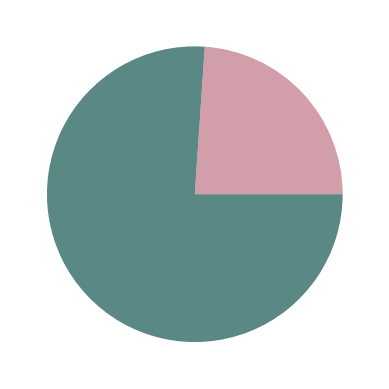

In [ ]:
import matplotlib.pyplot as plt
sizes = [161, 512]
colors = ["#D19EAA","#5A8884"]
fig, ax = plt.subplots()
ax.pie(sizes,colors=colors)
plt.savefig("pie.png",transparent=True, dpi = 300)

Wordclouds of the two groups:

In [ ]:
from wordcloud import WordCloud,STOPWORDS

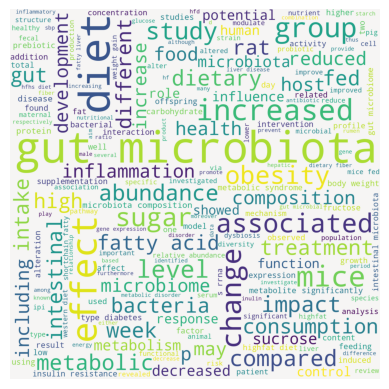

In [ ]:
text = " ".join(df["clean_text"])
wordcloud = WordCloud(width = 1600, height = 1600, 
            background_color ="#F6F5F4").generate(text)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud.png",dpi=300)
plt.show()

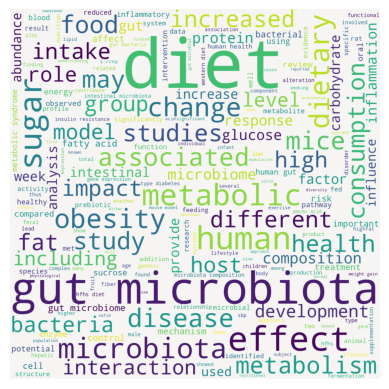

In [ ]:
text = " ".join(df_human["clean_text"])
wordcloud_human = WordCloud(width = 1600, height = 1600, 
            background_color ="#F6F5F4").generate(text)
# Generate plot
plt.imshow(wordcloud_human)
plt.axis("off")
plt.savefig("wordcloud.png",dpi=300)
plt.show()

Next we are going to highlight the words only present in a group and viceversa:

In [ ]:
cond_sugar = [i in list(wordcloud_human.words_.keys()) for i in list(wordcloud.words_.keys())]
color_sugar = ["black" if i else "red" for i in cond_sugar]

In [ ]:
color_dict = {}
for i in range(len(list(wordcloud.words_.keys()))):
    color_dict[list(wordcloud.words_.keys())[i]] = color_sugar[i]

In [ ]:
class SimpleGroupedColorFunc(object):

    def __init__(self, color_dict, default_color):
        self.word_to_color = color_dict

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [ ]:
grouped_color_func = SimpleGroupedColorFunc(color_dict, "blue")

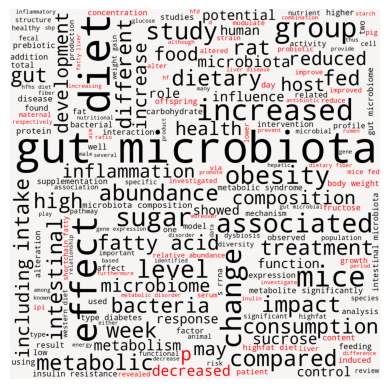

In [ ]:
wordcloud.recolor(color_func=grouped_color_func)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_diff_sugar.pdf",transparent=True,dpi=300)
plt.show()


In [ ]:
cond_human = [i in list(wordcloud.words_.keys()) for i in list(wordcloud_human.words_.keys())]
color_human = ["black" if i else "red" for i in cond_human]

In [ ]:
human_dict = {}
for i in range(len(list(wordcloud_human.words_.keys()))):
    human_dict[list(wordcloud_human.words_.keys())[i]] = color_human[i]

In [ ]:
grouped_color_func_human = SimpleGroupedColorFunc(human_dict, "grey")

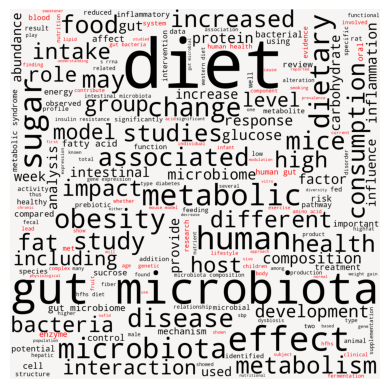

In [ ]:
wordcloud_human.recolor(color_func=grouped_color_func_human)
plt.imshow(wordcloud_human)
plt.axis("off")
plt.savefig("wordcloud_diff_human.pdf",transparent = True, dpi=300)
plt.show()

## Topic Modeling with LDA

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def remove_stopwords(tokenized_text):
  stop_words = stopwords.words('english')
  tokenized_text_without_stopwords = []
  for token in tokenized_text:
    if token.lower() not in stop_words and len(token)>2 and token.lower()!="fig":
      tokenized_text_without_stopwords.append(token)
  return tokenized_text_without_stopwords


def lemmatization(tokenized_text):
  wnl = WordNetLemmatizer()
  n_words = len(tokenized_text)
  for idx in range(n_words):
    tokenized_text[idx] = wnl.lemmatize(tokenized_text[idx])
  return tokenized_text


def stemming(tokenized_text):
    stemmer = SnowballStemmer("english")
    n_words = len(tokenized_text)
    for idx in range(n_words):
      tokenized_text[idx] = stemmer.stem(tokenized_text[idx])
    return tokenized_text
    

def preprocess(text,stopword = True, lemma = True,stem=False):
  tokenized_text =  WordPunctTokenizer().tokenize(text)
  if stopword:
    tokenized_text = remove_stopwords(tokenized_text)
  
  if lemma:
    tokenized_text = lemmatization(tokenized_text)
  
  if stem:
    tokenized_text = stemming(tokenized_text)

  return tokenized_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def get_lda_model(text, num_topics):
    main_text = text
    # all lower case    
    main_text = main_text.apply(lambda x: x.lower())
    # lemmatization and stop words removal
    main_text = main_text.apply(lambda x: preprocess(x))
    # dictionary creation
    id2word = corpora.Dictionary(main_text)

    # FILTERING
    # Filter out tokens that appear in less than no_below documents (absolute number) or
    # more than no_above documents (fraction of total corpus size, not absolute number).
    # after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None).

    id2word.filter_extremes(no_below=3, no_above=0.5)

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in main_text]

    lda_model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics,
                                    random_state=100,
                                    chunksize=10000,
                                    passes=15,
                                    iterations=500,
                                    alpha='auto',
                                    eta="auto",
                                    eval_every=None)
    
    return lda_model,corpus, id2word

In [ ]:
def get_wordcloud_from_lda(lda_model,num_topics):
    rows = num_topics//2
    cols = 2
    t = 0
    for i in range(rows):
        for j in range(cols):
            plt.imshow(WordCloud(background_color="#F6F5F4",max_words=500).fit_words(dict(lda_model.show_topic(t, 500))))
            plt.axis("off")
            t+=1
            plt.savefig(f"lda_{i}{j}.png",dpi=600)

    
    plt.show(fig)

In [ ]:
def assign_topic(model,docs):
  docs_tuples = model.get_document_topics(docs,minimum_probability=0)
  topic_docs = [0]*len(docs_tuples)
  max_prob_docs = [0]*len(docs_tuples)
  for n in range(len(docs_tuples)):
    doc_tuples = docs_tuples[n]
    doc_probs = [0]*model.num_topics
    for i in range(model.num_topics):
      doc_probs[i] = doc_tuples[i][1]
    
    topic = np.argmax(doc_probs)
    prob = np.max(doc_probs)
    topic_docs[n] = topic
    max_prob_docs[n] = prob
  
  return topic_docs, max_prob_docs

In [ ]:
def assign_multitopic(model,docs,threshold = 0.25):
  topic_prob = model.get_document_topics(docs,minimum_probability=0)
  topic_docs = [0]*len(topic_prob)
  for n in range(len(topic_prob)):
    doc = topic_prob[n]
    probs = [0]*model.num_topics
    for i in range(model.num_topics):
      probs[i] = doc[i][1]
    
    topic_list = [i for i in range(model.num_topics) if probs[i]>threshold]
    topic_docs[n] = topic_list
  
  return topic_docs

In [ ]:
sugar_lda,sugar_corpus, sugar_id2word = get_lda_model(df.clean_text,num_topics = 2)

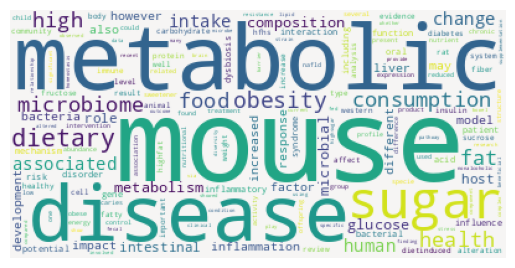

In [ ]:
get_wordcloud_from_lda(sugar_lda,num_topics= 2)

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_sugar = gensimvis.prepare(sugar_lda, sugar_corpus, sugar_id2word,sort_topics=True)
LDAvis_sugar
pyLDAvis.save_html(LDAvis_sugar, 'lda4_sugar.html')

In [ ]:
human_lda,human_corpus, human_id2word = get_lda_model(df_human.clean_text,num_topics = 2)

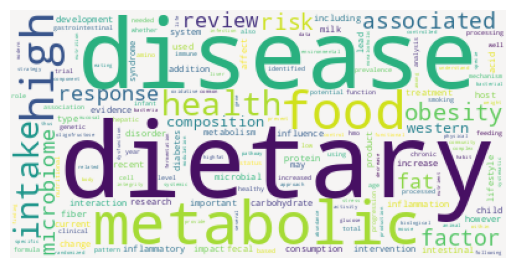

In [ ]:
get_wordcloud_from_lda(human_lda,num_topics= 4)

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_human = gensimvis.prepare(human_lda, human_corpus, human_id2word,sort_topics=True)
LDAvis_human
pyLDAvis.save_html(LDAvis_human, 'lda4_human.html')

In [ ]:
topic_names = {"0":"Topic 1",
               "1":"Topic 2",
               "2":"Topic 3",
               "3":"Topic 4"}

In [ ]:
topic_sugar,prob_sugar = assign_topic(sugar_lda,sugar_corpus)
topic_human,prob_human = assign_topic(human_lda,human_corpus)

multitopics_sugar = assign_multitopic(sugar_lda,sugar_corpus)
multitopics_human = assign_multitopic(human_lda,human_corpus)


In [ ]:
df["Topic"] = topic_sugar
df["pTopic"] = prob_sugar
df["MultiTopic"] = multitopics_sugar

df_human["Topic"] = topic_human
df_human["pTopic"] = prob_human
df_human["MultiTopic"] = multitopics_human

Lets now define the top article for each topic and print them:

In [ ]:
def print_top_titles(df,topic_names,top_n=5):
  for t in df.Topic.unique():
    print("Titoli dei documenti del Topic {} '{}'".format(t,topic_names[str(t)]))
    df_t = df[df["Topic"]==t]
    top_df = df_t.sort_values(by="pTopic",ascending=False).iloc[0:top_n]
    bot_df = df_t.sort_values(by="pTopic",ascending=True).iloc[0:top_n]
    print(f"Top {top_n}:")
    for i in range(top_df.shape[0]):
      print(top_df.title.iloc[i]," (p:",round(top_df.pTopic.iloc[i],3),")")
    print("\n")
    print(f"Bottom {top_n}:")
    for i in range(bot_df.shape[0]):
      print(bot_df.title.iloc[i],"( p:",round(bot_df.pTopic.iloc[i],3),")")
  
    print("\n\n")

In [ ]:
print_top_titles(df,topic_names,top_n=3)

Titoli dei documenti del Topic 1 'Topic 2'
Top 3:
<i>Eucommiae cortex</i> polysaccharides mitigate obesogenic diet-induced cognitive and social dysfunction via modulation of gut microbiota and tryptophan metabolism.  (p: 1.0 )
Consumption of a Western-Style Diet Modulates the Response of the Murine Gut Microbiome to Ciprofloxacin.  (p: 1.0 )
Amino Sugars Reshape Interactions between Streptococcus mutans and Streptococcus gordonii.  (p: 1.0 )


Bottom 3:
Intake of whole-grain and fiber-rich rye bread versus refined wheat bread does not differentiate intestinal microbiota composition in Finnish adults with metabolic syndrome. ( p: 0.5 )
Systems Biology Approaches for Understanding Metabolic Differences Using 'Multi-Omics' Profiling of Metabolites in Mice Fed with Honey and Mixed Sugars. ( p: 0.501 )
Bioactive Foods Decrease Liver and Brain Alterations Induced by a High-Fat-Sucrose Diet through Restoration of Gut Microbiota and Antioxidant Enzymes. ( p: 0.505 )



Titoli dei documenti del

In [ ]:
print_top_titles(df_human,topic_names,top_n=3)

Titoli dei documenti del Topic 0 'Topic 1'
Top 3:
Amino Sugars Reshape Interactions between Streptococcus mutans and Streptococcus gordonii.  (p: 0.999 )
Therapeutic potential of bioactive phytoconstituents found in fruits in the treatment of non-alcoholic fatty liver disease: A comprehensive review.  (p: 0.999 )
The Impact of Western Diet and Nutrients on the Microbiota and Immune Response at Mucosal Interfaces.  (p: 0.999 )


Bottom 3:
The effect of fermented Huyou juice on intestinal microbiota in a high-fat diet-induced obesity mouse model. ( p: 0.518 )
Prevention of Metabolic Syndrome by Phytochemicals and Vitamin D. ( p: 0.525 )
Gut microbiome of a porcine model of metabolic syndrome and HF-pEF. ( p: 0.534 )



Titoli dei documenti del Topic 1 'Topic 2'
Top 3:
Dietary pomegranate extract and inulin affect gut microbiome differentially in mice fed an obesogenic diet.  (p: 0.999 )
Impact of anthocyanin component and metabolite of Saskatoon berry on gut microbiome and relationship w

In [ ]:
df.groupby("Topic").count().iloc[:,0]

Topic
0     77
1    139
2    238
3    219
Name: id, dtype: int64

In [ ]:
df_human.groupby("Topic").count().iloc[:,0]

Topic
0    25
1    47
2    27
3    62
Name: id, dtype: int64